In [2]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uchall = pd.read_csv('challenger.csv')
uchall

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [101]:
uchall.shape

(23, 5)

In [102]:
uchall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
o_ring_ct          23 non-null int64
O_ring_failures    23 non-null int64
temperature        23 non-null int64
pressure           23 non-null int64
launch_id          23 non-null int64
dtypes: int64(5)
memory usage: 1.0 KB


In [103]:
uchall.apply(lambda x: sum(x.isnull()),axis=0)

o_ring_ct          0
O_ring_failures    0
temperature        0
pressure           0
launch_id          0
dtype: int64

In [104]:
uchall.head()

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [12]:
uchall.tail()

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
18,6,0,76,200,19
19,6,0,79,200,20
20,6,0,75,200,21
21,6,0,76,200,22
22,6,1,58,200,23


In [98]:
uchall.corr()

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O_ring_failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [16]:
uchall.pivot_table(uchall,index=['O_ring_failures'])

,launch_id,o_ring_ct,pressure,temperature
O_ring_failures,,,,
0,12.176471,6,144.117647,72.294118
1,11.000000,6,170.000000,63.600000
2,14.000000,6,200.000000,53.000000


In [89]:
x = uchall.loc[:,['temperature','pressure']].values
x

array([[ 66,  50],
       [ 70,  50],
       [ 69,  50],
       [ 68,  50],
       [ 67,  50],
       [ 72,  50],
       [ 73, 100],
       [ 70, 100],
       [ 57, 200],
       [ 63, 200],
       [ 70, 200],
       [ 78, 200],
       [ 67, 200],
       [ 53, 200],
       [ 67, 200],
       [ 75, 200],
       [ 70, 200],
       [ 81, 200],
       [ 76, 200],
       [ 79, 200],
       [ 75, 200],
       [ 76, 200],
       [ 58, 200]], dtype=int64)

In [90]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    

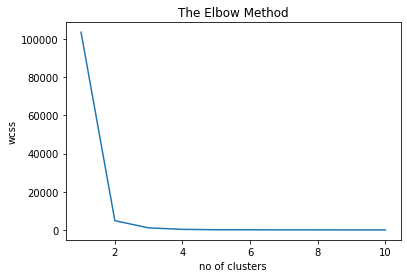

In [91]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [93]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

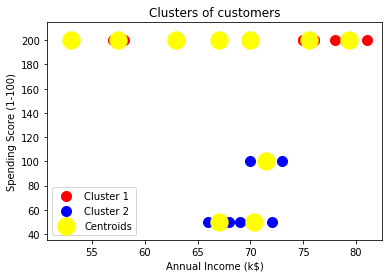

In [95]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [131]:
z = uchall[['temperature', 'pressure']]
u = uchall[['O_ring_failures']]

In [132]:
z

,temperature,pressure
0,66,50
1,70,50
2,69,50
3,68,50
4,67,50
5,72,50
6,73,100
7,70,100
8,57,200
9,63,200


In [133]:
u

,O_ring_failures
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [134]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(z)

In [136]:
x_std

array([[-0.51655145, -1.53134275],
       [ 0.06299408, -1.53134275],
       [-0.0818923 , -1.53134275],
       [-0.22677868, -1.53134275],
       [-0.37166507, -1.53134275],
       [ 0.35276684, -1.53134275],
       [ 0.49765322, -0.78196225],
       [ 0.06299408, -0.78196225],
       [-1.82052888,  0.71679873],
       [-0.95121059,  0.71679873],
       [ 0.06299408,  0.71679873],
       [ 1.22208513,  0.71679873],
       [-0.37166507,  0.71679873],
       [-2.4000744 ,  0.71679873],
       [-0.37166507,  0.71679873],
       [ 0.78742599,  0.71679873],
       [ 0.06299408,  0.71679873],
       [ 1.65674427,  0.71679873],
       [ 0.93231237,  0.71679873],
       [ 1.36697151,  0.71679873],
       [ 0.78742599,  0.71679873],
       [ 0.93231237,  0.71679873],
       [-1.6756425 ,  0.71679873]])

In [137]:
import numpy as np
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[1.04545455 0.04162758]
 [0.04162758 1.04545455]]


In [138]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [139]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[1.08708213 1.00382697]


In [145]:
eig_vals[0]/sum(eig_vals)

0.5199088425731898

In [146]:
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([-1.44807987, -1.0382793 , -1.14072944, -1.24317959, -1.34562973,
       -0.83337902, -0.20103684, -0.50838727, -0.78045507, -0.16575421,
        0.55139679,  1.37099793,  0.24404636, -1.19025564,  0.24404636,
        1.0636475 ,  0.55139679,  1.67834836,  1.16609764,  1.47344807,
        1.0636475 ,  1.16609764, -0.67800493])

In [148]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=u
result

,PC1,y-axis,label
0,-1.448080,0.0,0
1,-1.038279,0.0,1
2,-1.140729,0.0,0
3,-1.243180,0.0,0
4,-1.345630,0.0,0
5,-0.833379,0.0,0
6,-0.201037,0.0,0
7,-0.508387,0.0,0
8,-0.780455,0.0,1
9,-0.165754,0.0,1


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

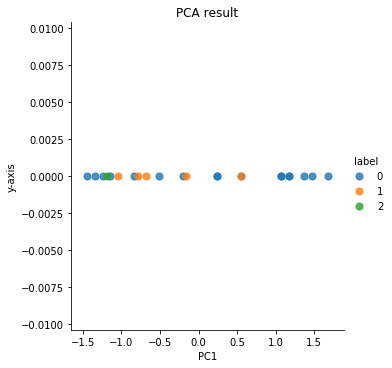

In [151]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')

#title
plt.title('PCA result')

# hue='label' .....unknown labels
# fit_reg.... fit regression